In [90]:
import pandas as pd
import json
import random
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [3]:
bookdata_chunks = pd.read_json('goodreads_books.json', lines=True, orient='records', chunksize=10**5)

In [4]:
book_columns = []
for i,v in enumerate(bookdata_chunks):
    if i != 0:
        break
    book_columns = v.columns

In [5]:
book_columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [6]:
books_array = []

for key,value in enumerate(bookdata_chunks):
    books_1000th = value.iloc[[x for x in range(value.shape[0]) if x%100==0]]
    books_array.append(books_1000th)

sampled_books = pd.concat(books_array)

In [54]:
sampled_books

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
200000,045161271X,1,[313415],US,,"[{'count': '94133', 'name': 'to-read'}, {'coun...",,false,3.99,B002CIY8OC,...,8,,1954,https://www.goodreads.com/book/show/368752.The...,https://s.gr-assets.com/assets/nophoto/book/11...,368752,6,2377563,The Inferno,The Inferno
200100,,5,[],US,,"[{'count': '560', 'name': 'to-read'}, {'count'...",,false,4.02,,...,,,,https://www.goodreads.com/book/show/30063350-a...,https://s.gr-assets.com/assets/nophoto/book/11...,30063350,8,47296136,American Pharaoh,American Pharaoh
200200,,4,[],US,,"[{'count': '493', 'name': 'to-read'}, {'count'...",B01G4PK09K,true,4.23,B01G4PK09K,...,,,,https://www.goodreads.com/book/show/31228890-a...,https://s.gr-assets.com/assets/nophoto/book/11...,31228890,4,50768908,All Tyed Up,All Tyed Up
200300,0759298130,4,[],US,,"[{'count': '52', 'name': 'to-read'}, {'count':...",,false,3.91,B00J90ET90,...,5,,2009,https://www.goodreads.com/book/show/6803527-th...,https://images.gr-assets.com/books/1385349390m...,6803527,18,209287,The City on the Edge of Forever,The City on the Edge of Forever
200400,,2,[],US,,"[{'count': '2', 'name': 'to-read'}, {'count': ...",,false,4.50,,...,,,2008,https://www.goodreads.com/book/show/4953423-ca...,https://s.gr-assets.com/assets/nophoto/book/11...,4953423,4,5019171,Cannot Exist No. 1,Cannot Exist No. 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360200,,15,[],US,eng,"[{'count': '247', 'name': 'to-read'}, {'count'...",B00FGK6P80,true,4.49,,...,,,,https://www.goodreads.com/book/show/18916157-m...,https://s.gr-assets.com/assets/nophoto/book/11...,18916157,74,26333588,Miserable Matrimony,Miserable Matrimony
2360300,,5,"[589773, 905217]",US,eng,"[{'count': '189', 'name': 'to-read'}, {'count'...",,true,3.95,,...,,,2013,https://www.goodreads.com/book/show/20692781-b...,https://s.gr-assets.com/assets/nophoto/book/11...,20692781,40,40012092,Black Corner,Black Corner
2360400,,2,[],US,eng,[],,true,1.50,,...,,,,https://www.goodreads.com/book/show/29502728-f...,https://images.gr-assets.com/books/1457922219m...,29502728,4,49790008,Flash of Bright,Flash of Bright
2360500,,2,[],US,,"[{'count': '219', 'name': 'to-read'}, {'count'...",B003HO5VLO,true,3.63,,...,,,,https://www.goodreads.com/book/show/8217785-du...,https://s.gr-assets.com/assets/nophoto/book/11...,8217785,95,12429588,Duncan's World,Duncan's World


In [11]:
sampled_books.popular_shelves[200000]

[{'count': '94133', 'name': 'to-read'},
 {'count': '4617', 'name': 'currently-reading'},
 {'count': '4320', 'name': 'classics'},
 {'count': '2192', 'name': 'poetry'},
 {'count': '1290', 'name': 'fiction'},
 {'count': '946', 'name': 'favorites'},
 {'count': '687', 'name': 'classic'},
 {'count': '598', 'name': 'owned'},
 {'count': '512', 'name': 'books-i-own'},
 {'count': '491', 'name': 'literature'},
 {'count': '376', 'name': 'religion'},
 {'count': '306', 'name': 'school'},
 {'count': '299', 'name': 'fantasy'},
 {'count': '207', 'name': 'italian'},
 {'count': '195', 'name': 'owned-books'},
 {'count': '189', 'name': 'default'},
 {'count': '179', 'name': 'philosophy'},
 {'count': '145', 'name': 'medieval'},
 {'count': '136', 'name': 'classic-literature'},
 {'count': '127', 'name': 'library'},
 {'count': '120', 'name': 'mythology'},
 {'count': '120', 'name': 'italy'},
 {'count': '117', 'name': 'rory-gilmore-reading-challenge'},
 {'count': '113', 'name': 'read-for-school'},
 {'count': '107

In [12]:
genre_list = {}
for shelf in sampled_books['popular_shelves']:
    for genre in shelf:
        if genre['name'] in genre_list.keys():
            genre_list[genre['name']]+=int(genre['count'])
        else:
            genre_list[genre['name']]=int(genre['count'])
genre_list

{'to-read': 76806247,
 'currently-reading': 4853272,
 'classics': 2039932,
 'poetry': 60951,
 'fiction': 2217921,
 'favorites': 2684548,
 'classic': 443242,
 'owned': 692857,
 'books-i-own': 711256,
 'literature': 261563,
 'religion': 28605,
 'school': 132523,
 'fantasy': 1382912,
 'italian': 2997,
 'owned-books': 247832,
 'default': 201895,
 'philosophy': 103251,
 'medieval': 4671,
 'classic-literature': 67838,
 'library': 195734,
 'mythology': 44842,
 'italy': 7213,
 'rory-gilmore-reading-challenge': 32653,
 'read-for-school': 58751,
 'my-library': 99241,
 'for-school': 43216,
 'horror': 225067,
 'to-buy': 186042,
 'classics-to-read': 41791,
 'italian-literature': 1991,
 'school-books': 33987,
 'my-books': 126538,
 'series': 285356,
 'high-school': 49564,
 'history': 137650,
 'college': 16130,
 'classic-lit': 26858,
 'epic': 12267,
 'adult': 161719,
 'kindle': 276684,
 'translated': 12559,
 'historical-fiction': 496257,
 'classic-fiction': 28535,
 '14th-century': 212,
 'epic-poetry':

In [52]:
genres = pd.DataFrame.from_dict(genre_list, orient='index')
top_12_genres_sorted = genres.sort_values(0,ascending=False)[0:12]
top_10_genres_sorted = genres.sort_values(0,ascending=False)[2:12]
top_12_genres_sorted

,0
to-read,76806247
currently-reading,4853272
favorites,2684548
fiction,2217921
classics,2039932
fantasy,1382912
young-adult,800049
books-i-own,711256
owned,692857
historical-fiction,496257


In [28]:
top_10_genres_sorted

,0
favorites,2684548
fiction,2217921
classics,2039932
fantasy,1382912
young-adult,800049
books-i-own,711256
owned,692857
historical-fiction,496257
romance,478397
classic,443242


[Text(0.5, 0, 'Total number of shelves'), Text(0, 0.5, 'Shelf name')]

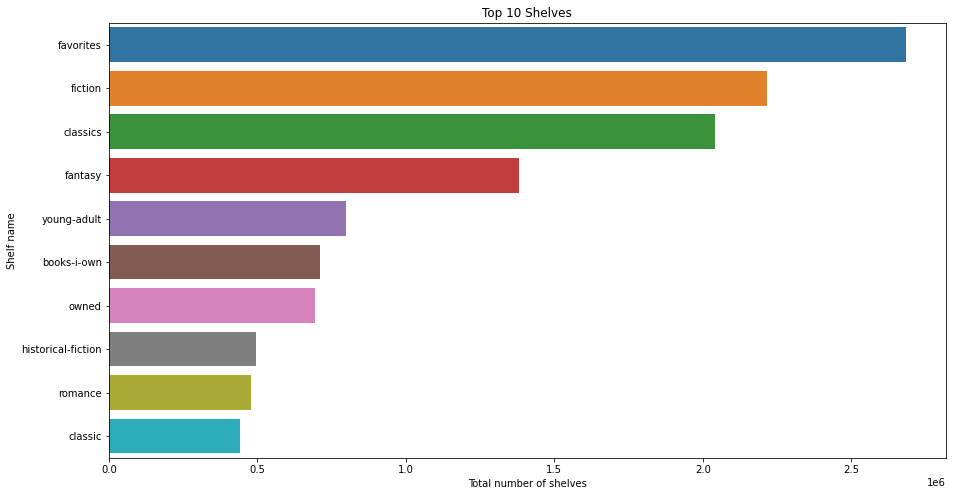

In [186]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y=top_10_genres_sorted.index, x=top_10_genres_sorted[0], data=top_10_genres_sorted)
ax.set_title('Top 10 Shelves')
ax.set(xlabel='Total number of shelves', ylabel='Shelf name')

In [36]:
publication_year_books = {}
for year in sampled_books['publication_year']:
    if year == '':
        continue
    if year in publication_year_books.keys():
        publication_year_books[year] += 1
    else:
        publication_year_books[year] = 1
publication_year_books

{'1954': 7,
 '2009': 730,
 '2008': 606,
 '2012': 1397,
 '2010': 856,
 '2003': 350,
 '2014': 1370,
 '2017': 662,
 '2013': 1582,
 '2006': 439,
 '2016': 1116,
 '2011': 1099,
 '2004': 358,
 '1976': 34,
 '2015': 1266,
 '2002': 308,
 '1998': 203,
 '2007': 543,
 '1999': 193,
 '1997': 154,
 '1984': 49,
 '1975': 36,
 '1993': 123,
 '1996': 170,
 '1990': 82,
 '1968': 22,
 '1950': 4,
 '2000': 262,
 '2005': 397,
 '1956': 9,
 '1991': 86,
 '1969': 22,
 '1987': 86,
 '1986': 44,
 '1973': 31,
 '1992': 117,
 '1988': 65,
 '1995': 127,
 '2001': 231,
 '1994': 119,
 '1980': 40,
 '1966': 17,
 '1977': 34,
 '1989': 88,
 '1971': 20,
 '1423': 1,
 '1982': 48,
 '1983': 45,
 '1985': 55,
 '1942': 2,
 '1978': 25,
 '1958': 14,
 '1944': 4,
 '1949': 6,
 '1970': 17,
 '1981': 31,
 '1960': 20,
 '1911': 1,
 '1948': 5,
 '1941': 2,
 '1947': 4,
 '1951': 4,
 '1974': 22,
 '2550': 1,
 '12': 1,
 '1936': 2,
 '1957': 9,
 '1961': 13,
 '1953': 4,
 '1924': 1,
 '1921': 3,
 '1932': 1,
 '1906': 3,
 '2018': 11,
 '1965': 11,
 '1424': 1,
 '19

In [180]:
publication_year_list = pd.DataFrame.from_dict(publication_year_books, orient='index')
publication_year_books_sorted = publication_year_list.sort_values(0,ascending=False)[0:20]
publication_year_books_sorted

,0
2013,1582
2012,1397
2014,1370
2015,1266
2016,1116
2011,1099
2010,856
2009,730
2017,662
2008,606


[Text(0.5, 0, 'Number of books'), Text(0, 0.5, 'Publication Year')]

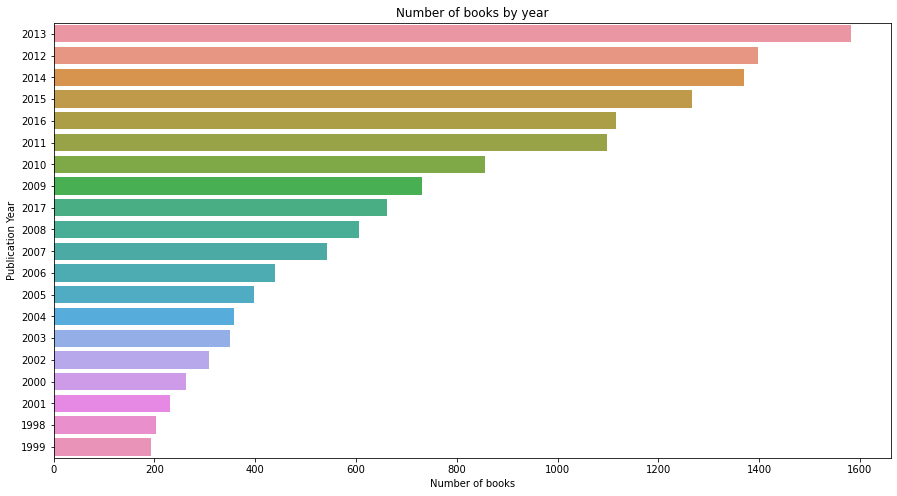

In [187]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y = publication_year_books_sorted.index, x = publication_year_books_sorted[0], data = publication_year_books_sorted)
ax.set_title('Number of books by year')
ax.set(xlabel='Number of books', ylabel='Publication Year')

In [67]:
sampled_books_df = sampled_books.apply(lambda x: pd.to_numeric(x, errors='ignore'))

<AxesSubplot:>

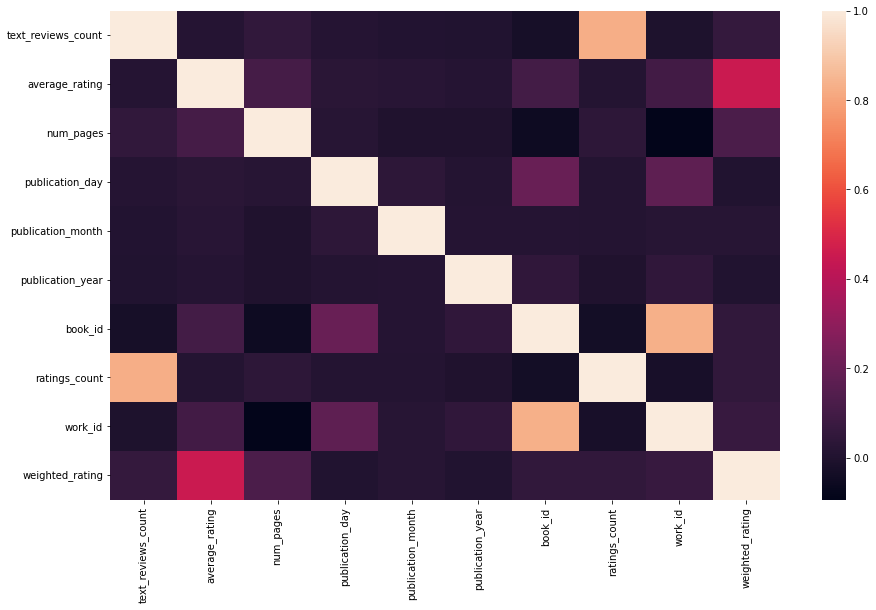

In [189]:
plt.figure(figsize=(15,9))
corr = sampled_books_df.corr()
sns.heatmap(corr)

In [135]:
sampled_books_df.describe()

,text_reviews_count,average_rating,num_pages,publication_day,publication_month,publication_year,book_id,ratings_count,work_id
count,21601.000000,21601.000000,14680.000000,12303.000000,13581.000000,16125.000000,2.160700e+04,21601.000000,2.160100e+04
mean,24.466367,3.865774,261.391894,12.204340,6.400044,2008.982760,1.538766e+07,350.111291,2.067410e+07
std,199.987545,0.533027,173.792366,10.006965,3.408682,203.247454,1.075523e+07,6247.131234,1.898748e+07
min,0.000000,0.000000,0.000000,1.000000,1.000000,12.000000,1.650000e+02,0.000000,1.150000e+02
25%,2.000000,3.640000,147.000000,1.000000,3.000000,2004.000000,6.076224e+06,6.000000,2.212225e+06
50%,4.000000,3.910000,248.000000,11.000000,6.000000,2011.000000,1.589139e+07,21.000000,1.684981e+07
75%,11.000000,4.160000,346.000000,21.000000,9.000000,2014.000000,2.417834e+07,78.000000,4.186049e+07
max,14245.000000,5.000000,2508.000000,31.000000,12.000000,20016.000000,3.648796e+07,594067.000000,5.833724e+07


In [166]:
sampled_books_df.isna().sum()

isbn                       0
text_reviews_count         6
series                     0
country_code               0
language_code              0
popular_shelves            0
asin                       0
is_ebook                   0
average_rating             6
kindle_asin                0
similar_books              0
description                0
format                     0
link                       0
authors                    0
publisher                  0
num_pages               6927
publication_day         9304
isbn13                     0
publication_month       8026
edition_information        0
publication_year        5482
url                        0
image_url                  0
book_id                    0
ratings_count              6
work_id                    6
title                      0
title_without_series       0
weighted_rating            6
dtype: int64

In [167]:
# weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

# R = average for the book (mean) = average_rating

# v = number of votes for the book = ratings_count

# m = minimum votes required to be listed in the top 250 (200)

# C = the mean vote across the whole report (currently 3.865)

def calc_weighted_rating(x):
    if math.isnan(x['ratings_count']) or math.isnan(x['average_rating']):
        return 0
    else:
        return (x['ratings_count']/(x['ratings_count'] + 200))*x['average_rating'] + (200/(x['ratings_count'] + 200))*3.86

sampled_books_df['weighted_rating']=sampled_books_df.apply(lambda x:calc_weighted_rating(x), axis=1)

In [168]:
sampled_books_df['weighted_rating'].sort_values(ascending=False)

811200     4.637613
379400     4.626870
377200     4.549959
554600     4.537430
1378500    4.504075
             ...   
2118500    0.000000
2292200    0.000000
734300     0.000000
1873800    0.000000
1097000    0.000000
Name: weighted_rating, Length: 21607, dtype: float64

In [148]:
publication_year_ratings = {}
for year,avg_rating in zip(sampled_books_df.publication_year, sampled_books_df.average_rating): 
    if year == '' or math.isnan(year) or math.isnan(avg_rating) or int(year) > 9999 or avg_rating == 0.0:
        continue
    if year in publication_year_ratings.keys():
        publication_year_ratings[int(year)] = (publication_year_ratings[int(year)]+avg_rating)/2
    else:
        publication_year_ratings[int(year)] = avg_rating
publication_year_ratings

{1954: 3.8378125,
 2009: 4.027967938310213,
 2008: 3.3161264795192276,
 2012: 3.8230177528280724,
 2010: 3.8365936802542384,
 2003: 3.3726780498470634,
 2014: 3.63534240491977,
 2017: 4.199730271080183,
 2013: 3.8209659681012895,
 2006: 4.148966263855231,
 2016: 4.312906194710993,
 2011: 3.449419770416445,
 2004: 3.5455166352225627,
 1976: 3.0460281907056923,
 2015: 3.3077816847148522,
 2002: 3.9001102336890066,
 1998: 4.100364016998978,
 2007: 3.7906510298508884,
 1999: 3.7705129971144378,
 1997: 3.810863544960628,
 1984: 3.8680811082152733,
 1975: 3.9179716406413356,
 1993: 3.508882417415826,
 1996: 3.847168224227045,
 1990: 4.022378801558057,
 1968: 4.344873452186585,
 1950: 3.8462499999999995,
 2000: 3.8587802092080654,
 2005: 3.732879716788296,
 1956: 3.688984375,
 1991: 4.108350820046045,
 1969: 3.7031071090698244,
 1987: 3.7358636429951195,
 1986: 4.0687545882921405,
 1973: 3.4792912742123008,
 1992: 3.84577450552028,
 1988: 3.7083326039908355,
 1995: 3.308661437873462,
 2001: 4

In [149]:
publication_year_ratings_list = pd.DataFrame.from_dict(publication_year_ratings, orient='index')
publication_year_ratings_list_sorted = publication_year_ratings_list.sort_values(0,ascending=False)[:15]
publication_year_ratings_list_sorted

,0
1424,5.000000
1895,4.485000
1936,4.425000
1938,4.377187
1935,4.365000
2018,4.345156
1968,4.344873
2016,4.312906
1885,4.240000
1983,4.203570


[Text(0.5, 0, 'Publication year'), Text(0, 0.5, 'Average Rating')]

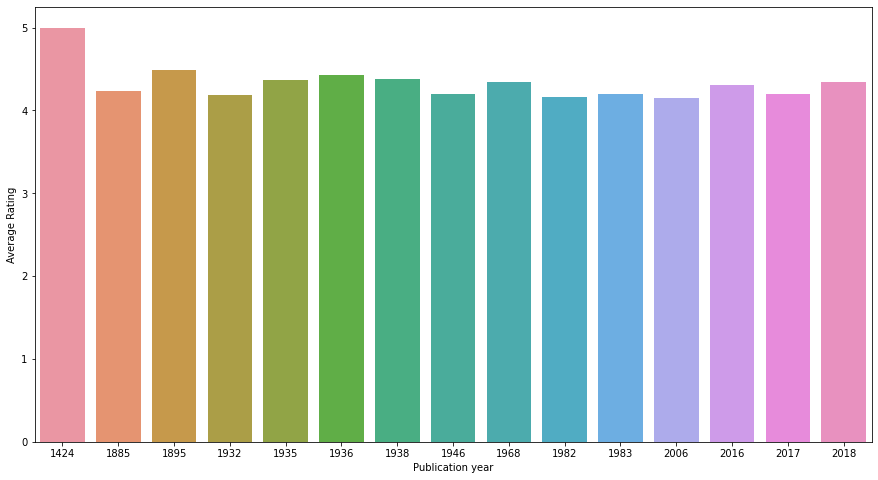

In [150]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = publication_year_ratings_list_sorted.index, y = publication_year_ratings_list_sorted[0], data = publication_year_ratings_list_sorted)
ax.set(xlabel='Publication year', ylabel='Average Rating')

In [170]:
book_weighted_ratings = {}
for title,weighted_rating in zip(sampled_books_df.title, sampled_books_df.weighted_rating):
    if title == '' or weighted_rating == 0.0:
        continue
    if title in book_weighted_ratings.keys():
        book_weighted_ratings[title] = (book_weighted_ratings[title] + weighted_rating)/2
    else:
        book_weighted_ratings[title] = weighted_rating
book_weighted_ratings

{'The Inferno': 3.8650615207151784,
 'American Pharaoh': 3.8661538461538463,
 'All Tyed Up': 3.8672549019607843,
 'The City on the Edge of Forever': 3.8641284403669727,
 'Cannot Exist No. 1': 3.872549019607843,
 'Star Strike (Inheritance Trilogy, #1)': 3.8010149488591662,
 'The Last Man': 3.8573631840796017,
 'My Year with Eleanor: A Memoir': 3.841545741324921,
 "The Hairy Bikers' 12 Days Of Christmas: Fabulous Festive Recipes To Feed Your Family And Friends": 4.001328671328671,
 'Kong Ødipus': 3.8484037558685444,
 'Hägring 38': 3.850344827586207,
 'On Emir': 3.8507462686567164,
 "His Son's Teacher": 3.878253968253968,
 'Lost & Bound': 3.9589041095890405,
 'Concepts in Federal Taxation 2014': 3.860696517412935,
 'Gloucester Cathedral': 3.866336633663366,
 'Jukebox Jezebel (Wild Ride, #1)': 3.84747572815534,
 'The Newsmakers (Newsmakers #1)': 3.757940379403794,
 'Melt My Heart, Cowboy (Love at the Chocolate Shop, #1)': 3.93220447284345,
 'Big Sky River (Parable, Montana, #3)': 4.0644192

In [194]:
book_weighted_ratings_list = pd.DataFrame.from_dict(book_weighted_ratings, orient='index')
book_weighted_ratings_list_sorted = book_weighted_ratings_list.sort_values(0,ascending=False)[:15]
book_weighted_ratings_list_sorted

,0
"Assassin's Fate (The Fitz and the Fool, #3)",4.637613
Hymns of The Church of Jesus Christ of Latter-day Saints,4.626870
"The Sandman Omnibus, Vol. 1",4.549959
The LDS Scriptures: Unabridged Complete King James Version Holy Bible /The Book of Mormon / Doctrine and Covenants / The Pearl of Great Price,4.537430
"The Mistress (The Original Sinners, #4)",4.504075
"Born of Fury (The League, #6)",4.496959
Bad Boys Do It Better: In Love With an Outlaw,4.485214
Humanae Vitae: Of Human Life,4.484348
"Skip Beat!, Vol. 04",4.475385
Ante Up,4.471840


[Text(0.5, 0, 'Book Title'), Text(0, 0.5, 'Weighted Rating')]

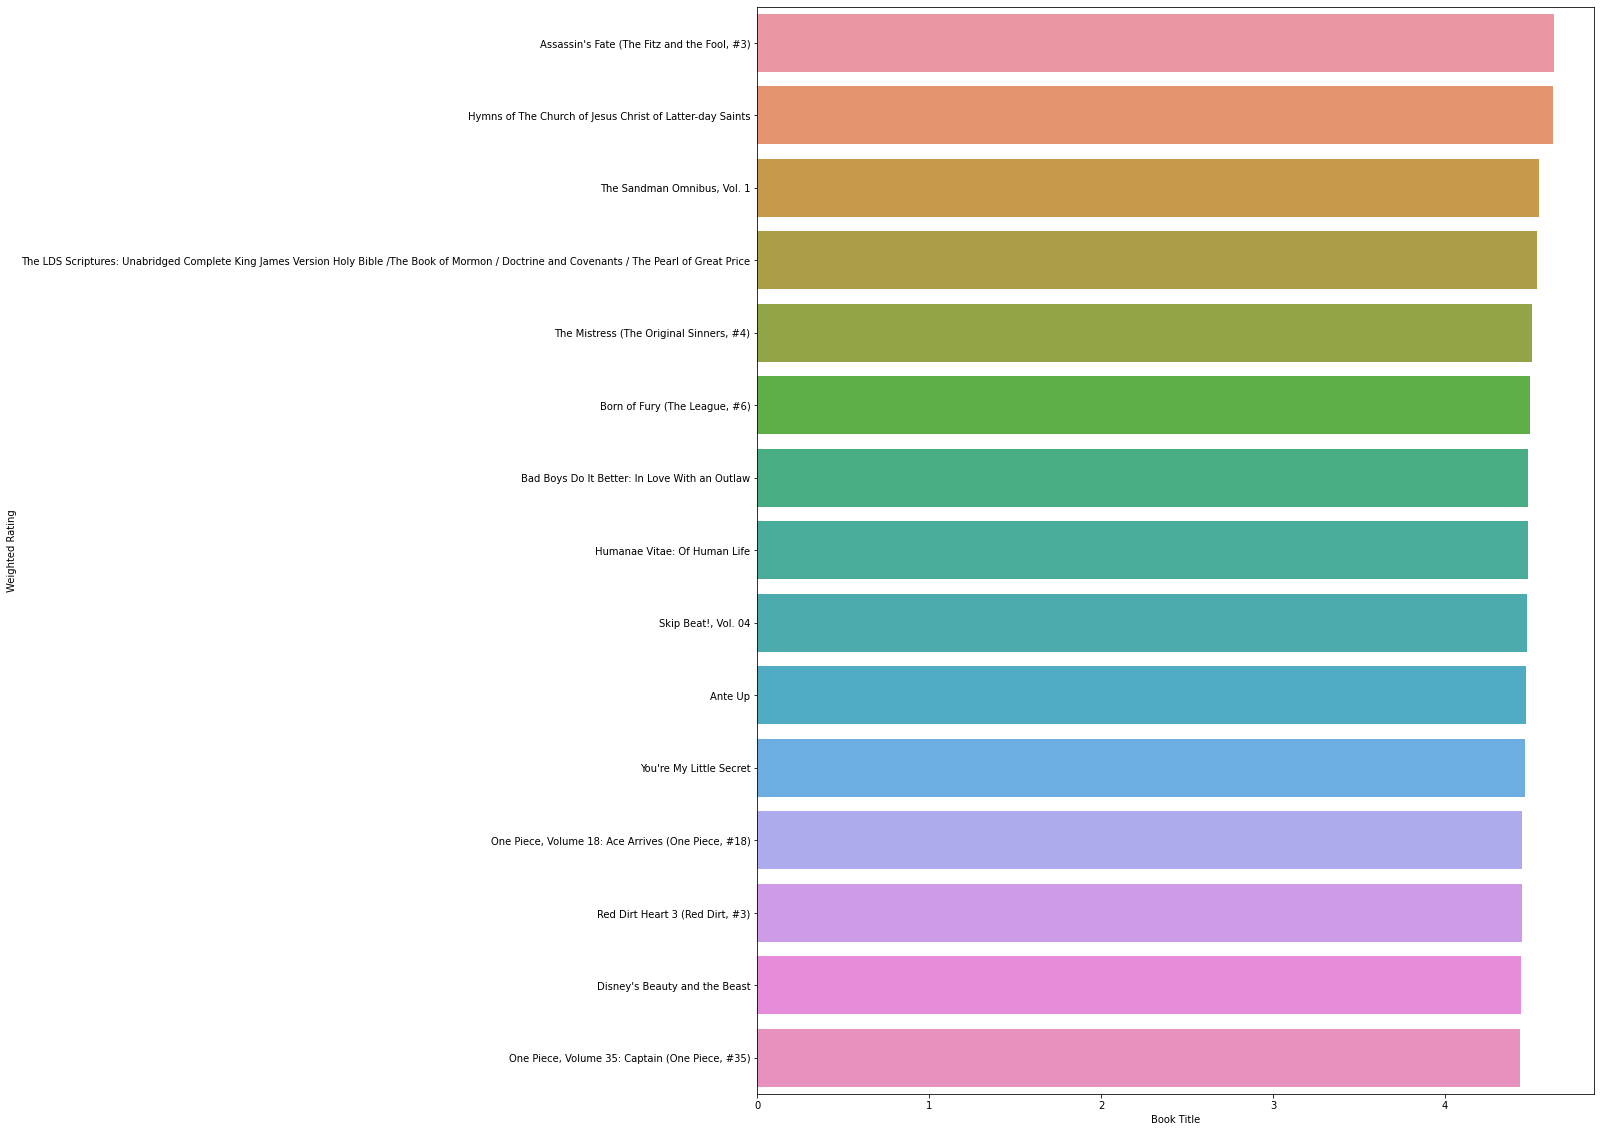

In [195]:
plt.figure(figsize=(15,20))
ax = sns.barplot(y = book_weighted_ratings_list_sorted.index, x = book_weighted_ratings_list_sorted[0], data = book_weighted_ratings_list_sorted)
ax.set(xlabel='Book Title', ylabel='Weighted Rating')